In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler

In [19]:
dataset = pd.read_csv('Heart Attack Data Set.csv')
dataset.duplicated().sum()
dataset.drop_duplicates(keep="first")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
X = dataset.iloc[:, :-1]
y = dataset.target

In [21]:
numeric_col=["age","trestbps","chol","thalach","oldpeak"]
skew_limit=0.75
skew_vals=X[numeric_col].skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

In [22]:
ft=FunctionTransformer(func=np.log1p)
skew=['oldpeak',"chol"]
X[skew]=ft.fit_transform(X[skew])

### Separando Testing y Training set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (242, 13)
X_test shape:  (61, 13)

Y_train shape:  (242,)
Y_test shape:  (61,)


In [27]:
sc=StandardScaler()
m=MinMaxScaler()
x_train_scaled=sc.fit_transform(X_train)
x_test_scaled=sc.transform(X_test)

x_train = pd.DataFrame(x_train_scaled, columns = X_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = X_test.columns[:])

### Entrenando

In [32]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [39]:
dir(classifier)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight'

In [43]:
classifier.feature_importances_

array([0.08738953, 0.03095022, 0.15864261, 0.07539508, 0.07650635,
       0.01090371, 0.01998755, 0.10141384, 0.08067069, 0.11725299,
       0.03654971, 0.11334654, 0.09099118])

In [42]:
classifier.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

### Prediciendo

In [36]:
y_pred = classifier.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  5]
 [ 5 30]]


0.8360655737704918

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


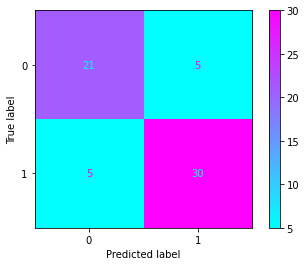

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()